# **Final Projects 2 - Logistic Regression dan SVM**

## **Perkenalan (Business and Data Understanding)**
<hr>
Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

### Nama        : Nadiatus Salam
### No Peserta  : PYTN-KS19-014

**Outline Notebook**
1. Perkenalan
2. Import Libraries
3. Data Loading
4. Data Cleaning
5. Explorasi Data
6. Data Preprocessing
7. Pendefinisian Model
8. Pelatihan Model
9. Evaluasi Model
10. Model Inference
11. Pengambilan Kesimpulan



**Projects Overview**
<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <b>Rain in Australia</b> yang berisi record data hujan harian selama 10 tahun di Australia. Kolom RainTomorrow adalah target variable yang mau diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih. Dataset ini memiliki 23 atribut, antara lain: </p>
    
**Attribute Information:**
- Date: tanggal hari itu
- Location: lokasi, nama kota di Australia
- MinTemp: temperatur terendah hari itu dalam celcius
- MaxTemp: temperatur tertinggi hari itu dalam celcius
- Rainfall: jumlah curah hujan hari itu dalam mm
- Evaporation: jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- Sunshine: jumlah jam hari itu cerah dengan cahaya matahari
- WindGustDir: arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
- WindGustSpeed: kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
- WindDir9am: arah angin jam 9 pagi
- WindDir3pm: arah angin jam 3 sore
- WindSpeed9am: kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- WindSpeed3pm: kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- Humidity9am: humiditas jam 9 pagi dalam persen
- Humidity3pm: humiditas jam 3 sore dalam persen
- Pressure9am: tekanan udara jam 9 pagi dalam hpa
- Pressure3pm: tekanan udara jam 3 sore dalam hpa
- Cloud9am: persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- Cloud3pm: persentase langit yang tertutup awan jam 3 sore
- Temp9am: temperatur jam 9 pagi dalam celcius
- Temp3pm: temperatur jam 3 sore dalam celcius
- RainToday: apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak maka 0.

**Objektif**

Final Project 2 ini dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut: 
* Mampu memahami konsep Classification dengan Logistic Regression dan SVM 
* Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM 
* Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi


**Dataset Link** : https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/

## **Import Libraries**
<hr>
Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project

In [1]:
# Import library yang dibutuhkan
# Data cleaning and manipulation 
import pandas as pd
import numpy as np
from scipy import stats


# Data Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

# Data Exploration
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# For Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

# Ignore Warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

## **Data Loading**
<hr>
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

### Import Dataset

In [2]:
# Membaca dataset dengan library pandas
df = pd.read_csv('weatherAUS.csv')

# Menampilkan data teratas dan tail
df 

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### Number of Rows and Columns

In [3]:
# Melihat jumlah baris dan kolom pada dataset
df.shape

(145460, 23)

In [4]:
# Cara lain untuk melihat baris dan kolom
print("Baris : ", df.shape[0])
print("Kolom : ", df.shape[1])

Baris :  145460
Kolom :  23


### Type of Data

In [5]:
# Melihat informasi datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Kesimpulan**

Berdasarkan informasi di atas, diketahui bahwa data terdiri dari 145460 baris dan 23 kolom. Terdapat `7 kolom dengan tipe data object` dan `16 kolom bertipe data float`. Dari 23 kolom, `hanya 2 kolom yang berisi data tidak null, yakni kolom Date dan Location`. Artinya, masih banyak ditemukan missing value yang harus dibersihkan pada data sebelum mengolahnya lebih lanjut.

###  Check Missing Values

In [6]:
# Memeriksa jumlah missing value 
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### Missing Value Inspection


In [7]:
dt = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percent":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt

,Missing_Value,Percent
Date,0,0.0 %
Location,0,0.0 %
MinTemp,1485,1.02 %
MaxTemp,1261,0.87 %
Rainfall,3261,2.24 %
Evaporation,62790,43.17 %
Sunshine,69835,48.01 %
WindGustDir,10326,7.1 %
WindGustSpeed,10263,7.06 %
WindDir9am,10566,7.26 %


<Figure size 432x288 with 0 Axes>

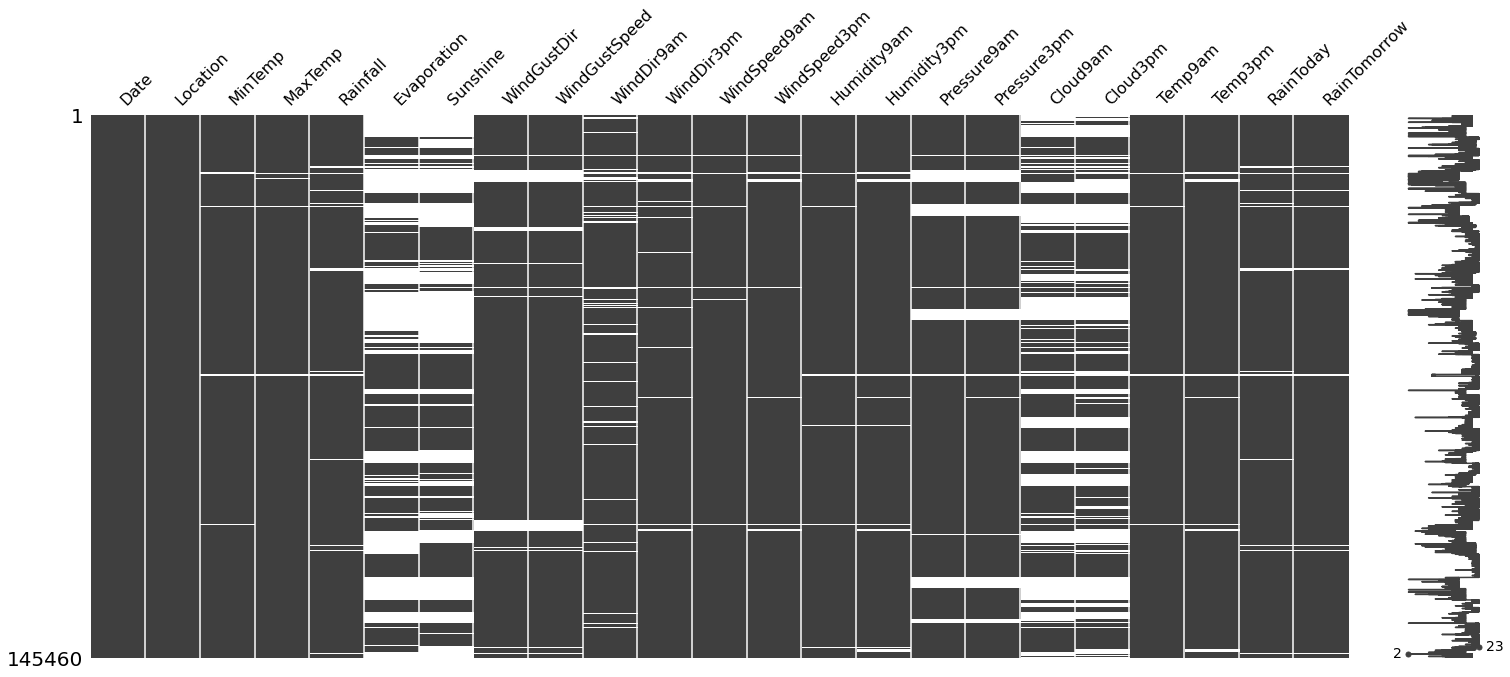

In [8]:
# Save Plot
plt.savefig("msno_matrix.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

msno.matrix(df);

### Calculate Unique Values

In [9]:
# Menghitung nilai unique pada data
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

###  View Statistical Data

In [10]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## **Data Cleaning**
<hr>
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [11]:
# Menampilkan 5 data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Check the duplicated values

In [12]:
# Melihat duplikasi data
df.duplicated().sum()

0

**Kesimpulan**

Karena duplicated values=0 berarti tidak ada duplicated value pada dataset. Selanjutnya cek apakah terdapat missing values pada data.

### Handling Missing Values

In [13]:
# Memeriksa jumlah missing value pada dataset 
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [14]:
# Menghapus kolom date
df.drop("Date", axis=1, inplace=True)

### Filling the missing values for numerical values

In [15]:
# Mencari kolom yang bertipe data selain object (numeric)
numerical = [var for var in df.columns if df[var].dtype!='O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
# Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Data Distribution

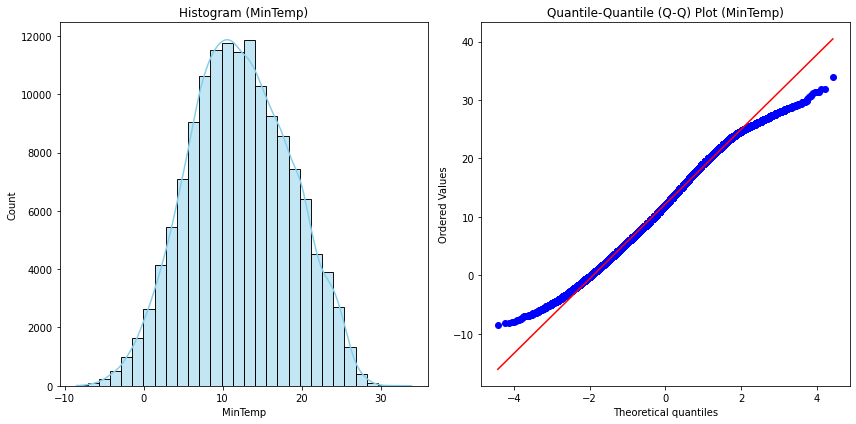

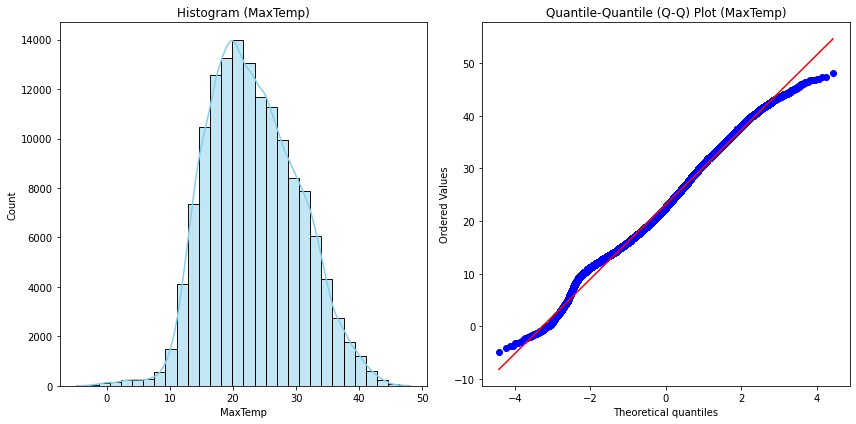

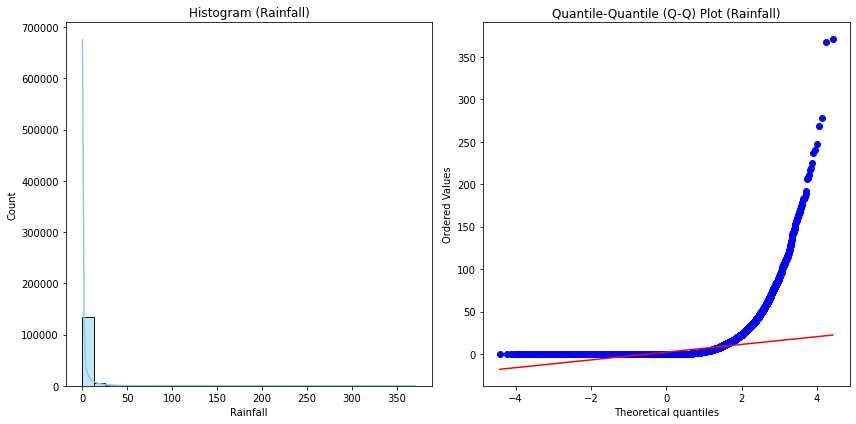

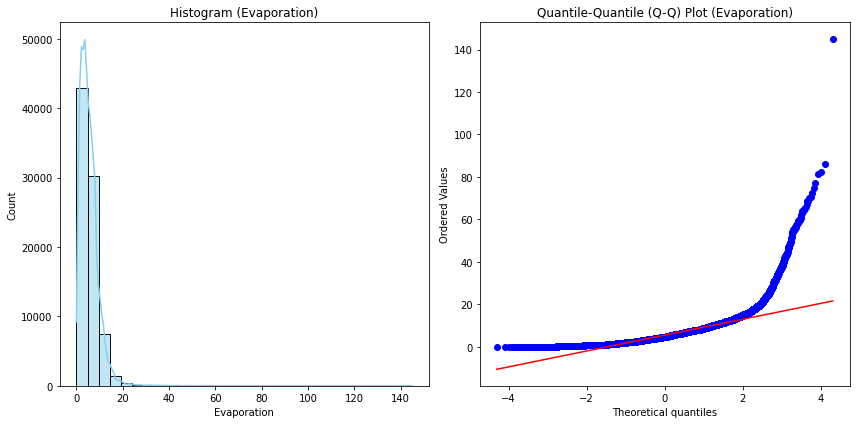

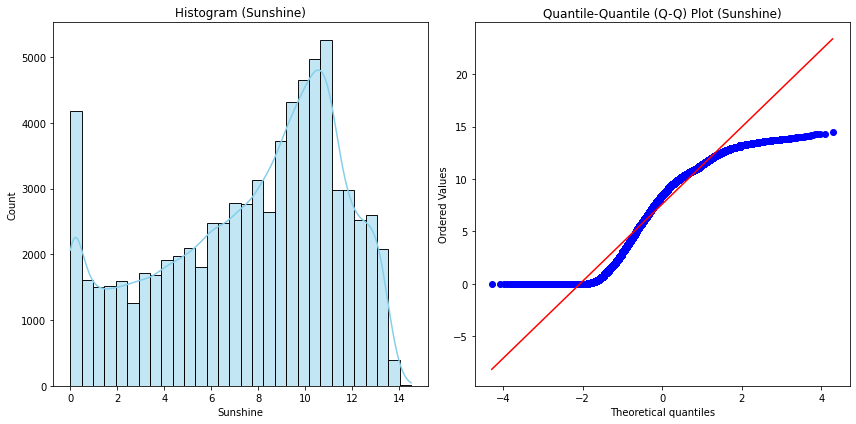

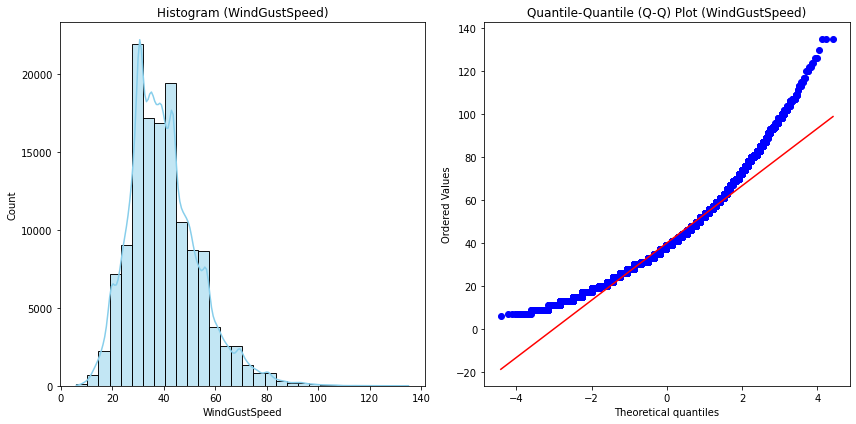

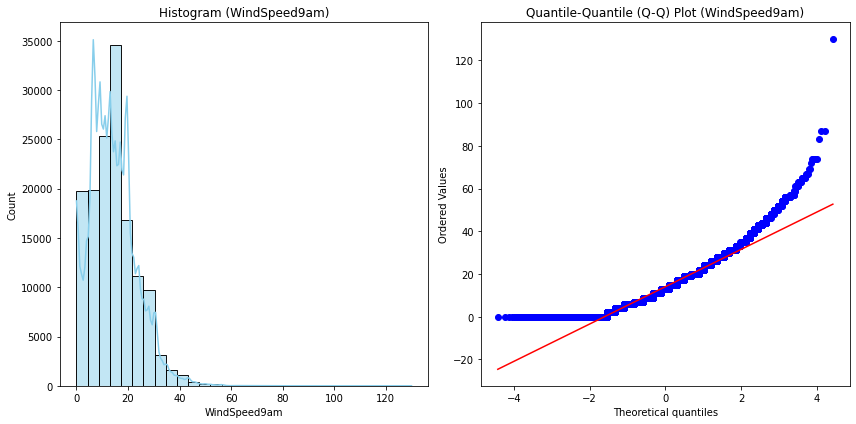

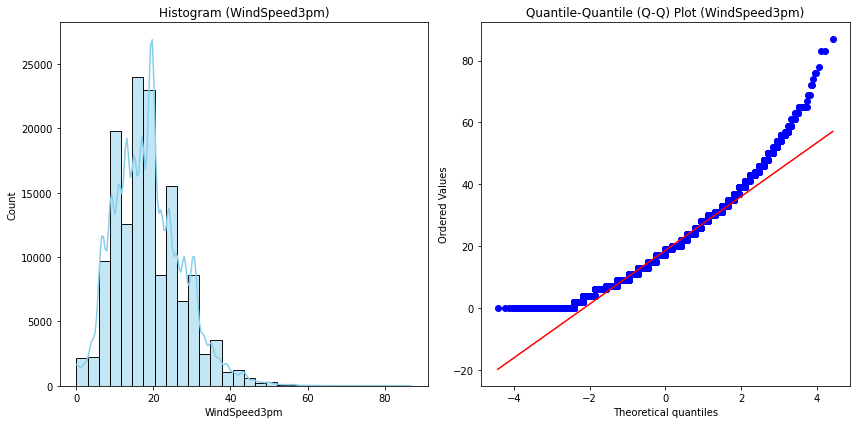

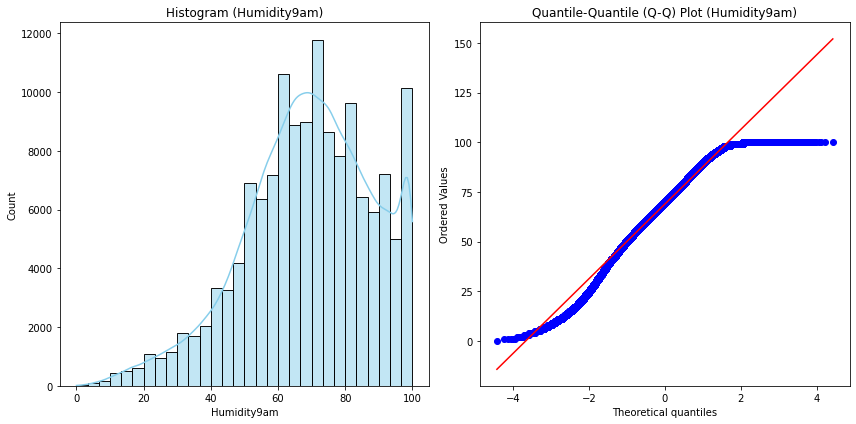

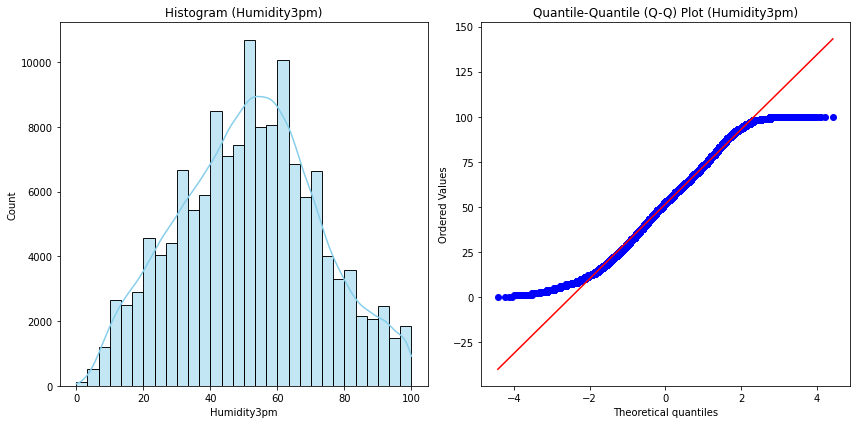

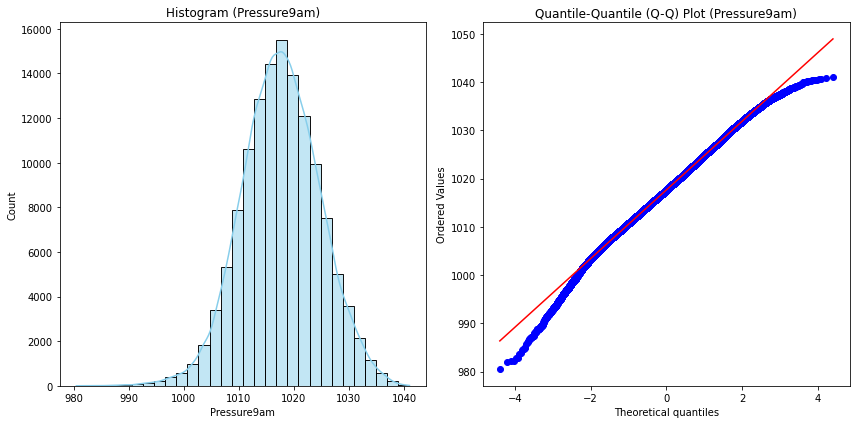

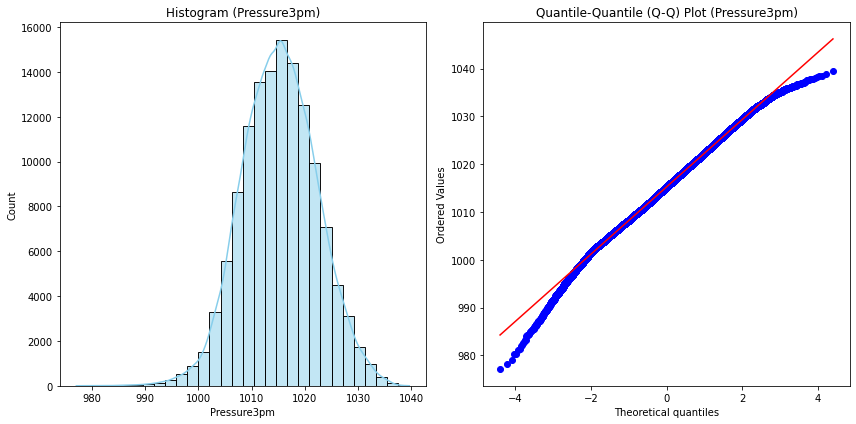

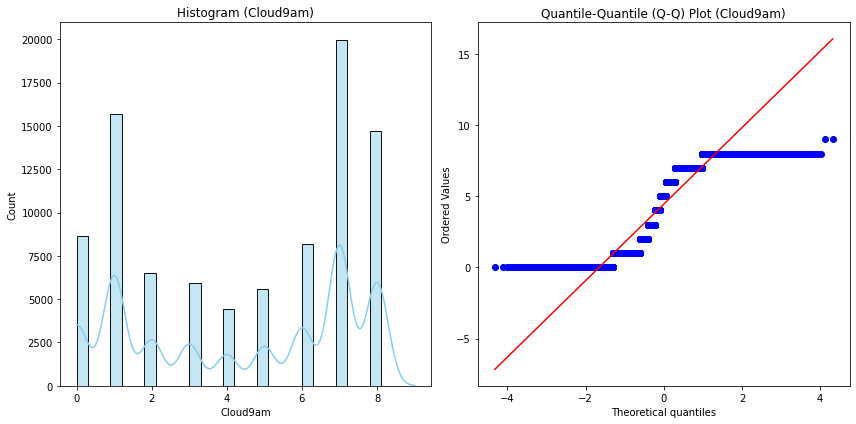

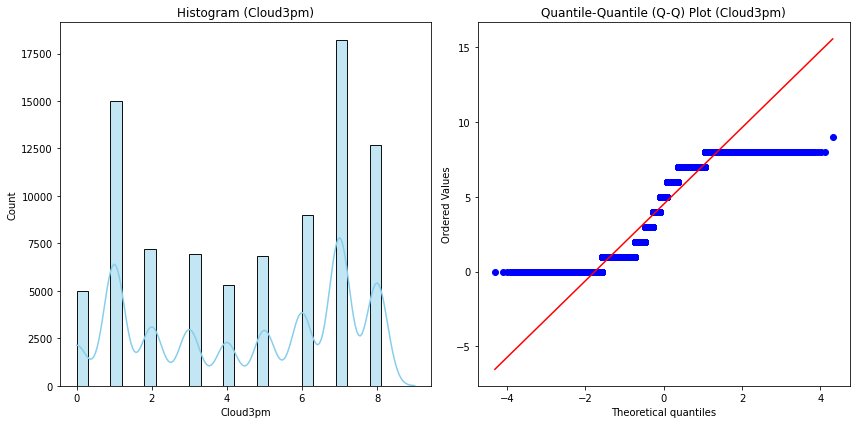

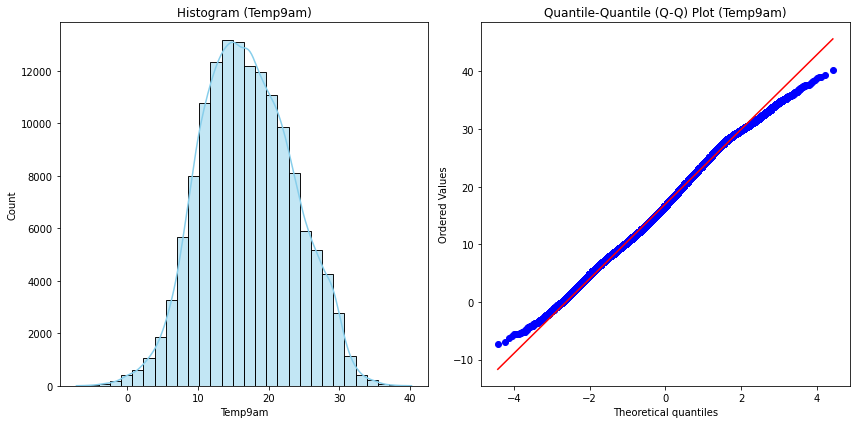

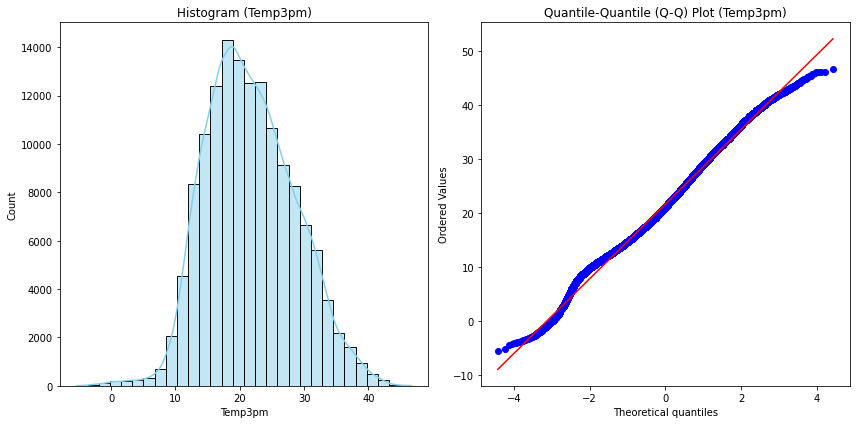

In [17]:
from scipy.stats import norm, probplot

# Memilih kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Menampilkan distribusi untuk setiap kolom numerik
for column in numeric_columns:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram ({column})')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    probplot(df[column].dropna(), dist='norm', plot=plt)
    plt.title(f'Quantile-Quantile (Q-Q) Plot ({column})')
    
    plt.tight_layout()
    plt.show()

In [18]:
# Mengisi numerical variables dengan median
df = df.fillna(df.median())

# Memeriksa jumlah missing value pada dataset 
df.isna().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64

**Kesimpulan**

Mengisi missing values pada data bertipe numeric agar menggunakan median karena median lebih tahan terhadap outlier.

### Drop the missing value in categorical values

In [19]:
# Menghilangkan missing values pada kolom WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow
df.dropna(subset=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow'], axis=0, inplace=True)

In [20]:
# Memeriksa jumlah missing value pada dataset 
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

**Kesimpulan**

Dapat dilihat sudah tidak terdapat missing values pada data.

### Check Outliers

In [21]:
# Mencetak statistik deskriptif dari kolom numerik dalam dataset.
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  123710.0  123710.0  123710.0     123710.0  123710.0       123710.0   
mean       12.0      23.0       2.0          5.0       8.0           41.0   
std         6.0       7.0       9.0          3.0       3.0           13.0   
min        -8.0      -5.0       0.0          0.0       0.0            7.0   
25%         8.0      18.0       0.0          4.0       8.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      29.0       1.0          6.0       9.0           48.0   
max        34.0      48.0     368.0         86.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      123710.0      123710.0     123710.0     123710.0     123710.0   
mean           15.0          19.0         68.0         51.0       1017.0   
std             8.0           9.0         19.0         21.0          7.0   
mi

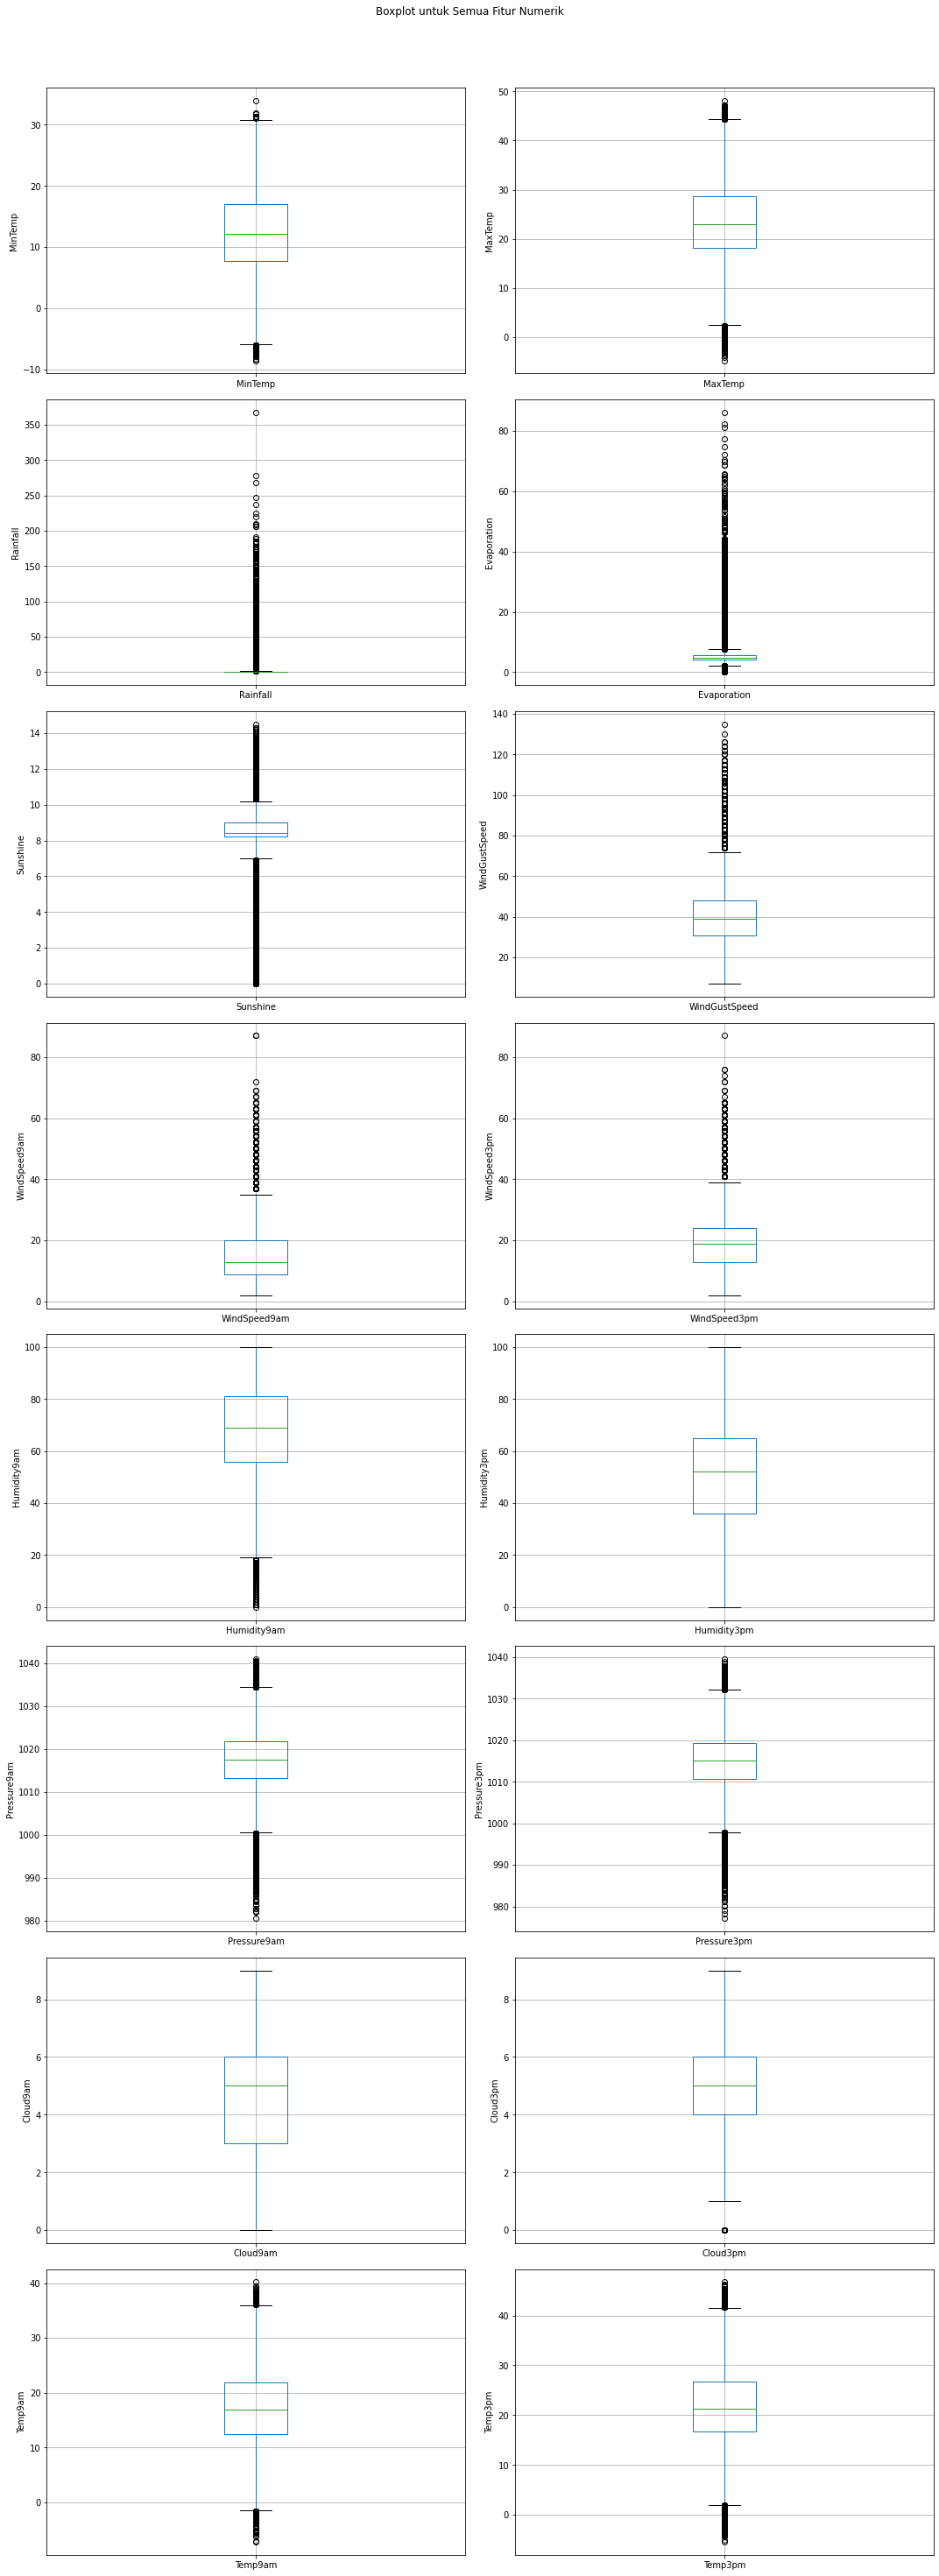

In [22]:
# Menggunakan hanya kolom numerik (fitur) dalam dataset
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Menghitung ukuran subplot yang dibutuhkan
num_plots = len(numeric_features.columns)
num_rows = num_plots // 2 + num_plots % 2  # Menyertakan satu baris ekstra jika jumlah subplot ganjil

# Membuat box plots untuk memvisualisasikan outliers
plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(numeric_features.columns, 1):
    plt.subplot(num_rows, 2, i)
    fig = df.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)

plt.suptitle("Boxplot untuk Semua Fitur Numerik", y=1.02)
plt.tight_layout()
plt.show()

**Kesimpulan**

Berdasarkan data di atas, terlihat jika Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, dan WindSpeed3pm memiliki jumlah outliers yang lebih banyak jika dibandingkan dengan kolom lain.

### Finding the Outliers

Mengecek apakah variabel Rainfall, Evaporation, WindGustSpeed, WindSpeed9am, dan WindSpeed3pm berdistribusi normal atau skewed dengan menggunakan plot histogram.

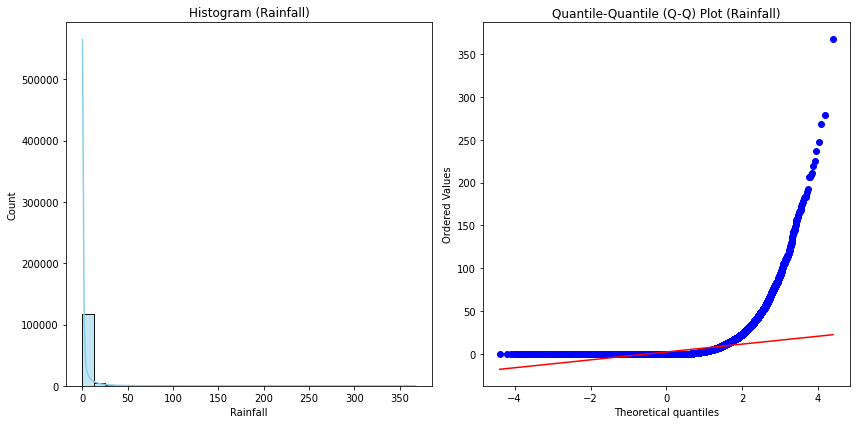

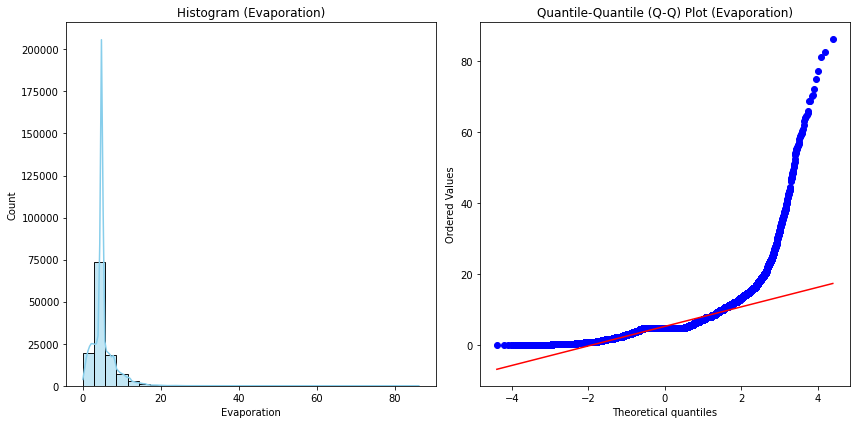

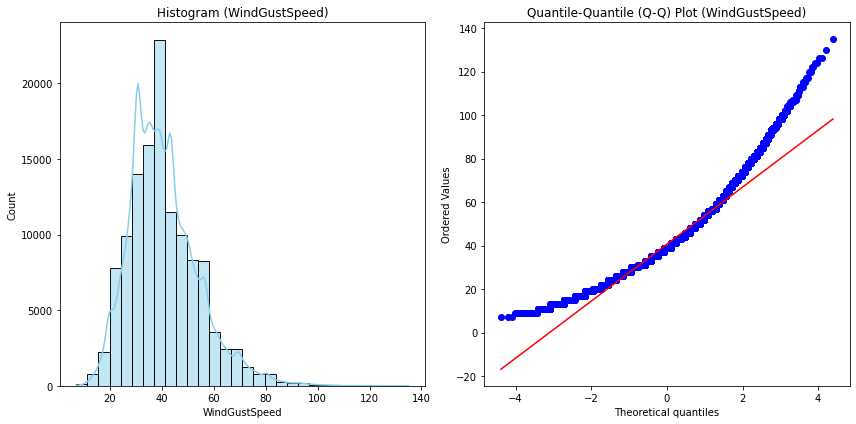

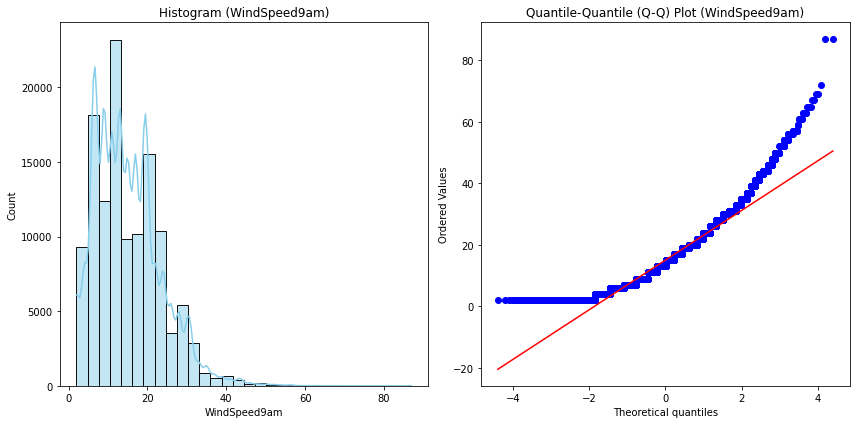

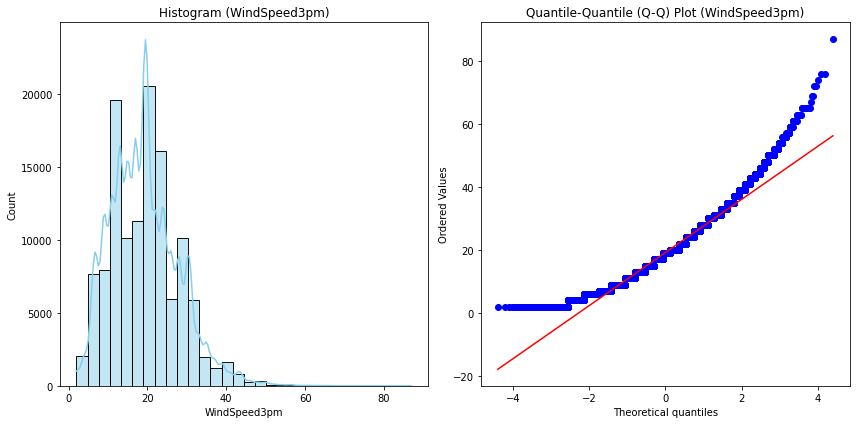

In [23]:
# Memilih kolom 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', dan 'WindSpeed3pm'
select_column = df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]

# Menampilkan distribusi untuk setiap kolom numerik
for column in select_column:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram ({column})')
    
    # Q-Q plot
    plt.subplot(1, 2, 2)
    probplot(df[column].dropna(), dist='norm', plot=plt)
    plt.title(f'Quantile-Quantile (Q-Q) Plot ({column})')
    
    plt.tight_layout()
    plt.show()

**Kesimpulan**

Berdasarkan plot histagram di atas, terlihat jika `semua variabel berdistribusi skewed`. Sehingga digunakan interquantile range untuk mencari outliers.

### Handling Outlier dengan metode IQR (Interquartile Range)

In [24]:
# IQR
# Kalkulasi batas atas dan bawah
Q1 = df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].quantile(0.25)
Q3 = df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

print('Nilai Maximum dari masing-masing Variable adalah: ', maximum)
print('Nilai Minimum dari masing-masing Variable adalah: ', minimum)


more_than = (df > maximum)
lower_than = (df < minimum)

# Menghapus outlier
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)


Nilai Maximum dari masing-masing Variable adalah:  Rainfall          2.0
Evaporation       7.7
WindGustSpeed    73.5
WindSpeed9am     36.5
WindSpeed3pm     40.5
dtype: float64
Nilai Minimum dari masing-masing Variable adalah:  Rainfall        -1.2
Evaporation      2.1
WindGustSpeed    5.5
WindSpeed9am    -7.5
WindSpeed3pm    -3.5
dtype: float64


In [25]:
print('\nPersebaran data setelah ditangani Outlier: ')
print(df[['Rainfall','Evaporation','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']].describe())


Persebaran data setelah ditangani Outlier: 
            Rainfall   Evaporation  WindGustSpeed   WindSpeed9am  \
count  123710.000000  123710.00000  123710.000000  123710.000000   
mean        0.486650       4.89197      40.482237      14.915330   
std         0.793145       1.66876      12.746265       7.985716   
min         0.000000       2.10000       7.000000       2.000000   
25%         0.000000       4.20000      31.000000       9.000000   
50%         0.000000       4.80000      39.000000      13.000000   
75%         0.800000       5.60000      48.000000      20.000000   
max         2.000000       7.70000      73.500000      36.500000   

        WindSpeed3pm  
count  123710.000000  
mean       19.085991  
std         8.292947  
min         2.000000  
25%        13.000000  
50%        19.000000  
75%        24.000000  
max        40.500000  


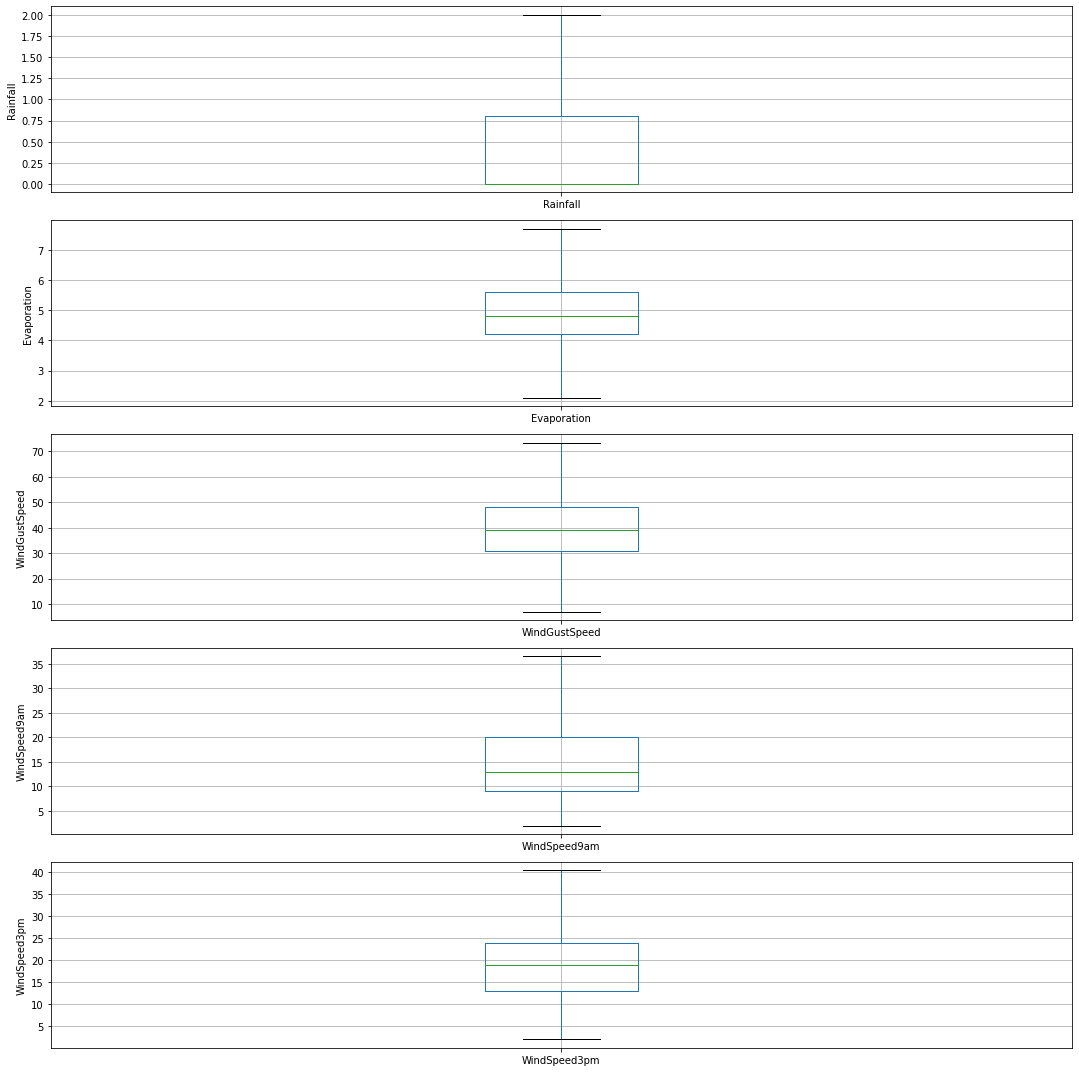

In [26]:
# Memilih kolom 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', dan 'WindSpeed3pm'
kolom_terpilih = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm']

# Membuat subplots secara individual
fig, axes = plt.subplots(nrows=len(kolom_terpilih), figsize=(15, 15))

# Plot boxplot untuk setiap kolom terpilih
for i, kolom in enumerate(kolom_terpilih):
    df.boxplot(column=kolom, ax=axes[i])
    axes[i].set_title('')
    axes[i].set_ylabel(kolom)

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()


## **Explorasi Data (EDA)** 
<hr>
Bagian ini berisi explorasi data pada dataset di atas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### Unique Values

In [27]:
# Mendapatkan daftar kolom dalam dataset
dataset_kolom = df.columns

# Loop melalui setiap kolom
for kolom in dataset_kolom:
    # Menampilkan nilai unik dalam kolom, diurutkan
    unique_val = df[kolom].sort_values().unique()
    print(f"Column: {kolom}")
    print(unique_val)
    print("\n")

Column: Location
['Adelaide' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat' 'Bendigo'
 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour' 'Dartmoor' 'Darwin'
 'GoldCoast' 'Hobart' 'Katherine' 'Launceston' 'Melbourne'
 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier' 'MountGinini' 'Nhil'
 'NorahHead' 'NorfolkIsland' 'Nuriootpa' 'PearceRAAF' 'Penrith' 'Perth'
 'PerthAirport' 'Portland' 'Richmond' 'Sale' 'SalmonGums' 'Sydney'
 'SydneyAirport' 'Townsville' 'Tuggeranong' 'Uluru' 'WaggaWagga' 'Walpole'
 'Watsonia' 'Williamtown' 'Witchcliffe' 'Wollongong' 'Woomera']


Column: MinTemp
[-8.5 -8.2 -7.8 -7.6 -7.5 -7.3 -7.2 -7.1 -7.  -6.9 -6.8 -6.7 -6.6 -6.5
 -6.4 -6.3 -6.2 -6.1 -6.  -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1
 -5.  -4.9 -4.8 -4.7 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7
 -3.6 -3.5 -3.4 -3.3 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3
 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9
 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1 

Column: WindGustDir
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


Column: WindGustSpeed
[ 7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.  28.  30.  31.
 33.  35.  37.  39.  41.  43.  44.  46.  48.  50.  52.  54.  56.  57.
 59.  61.  63.  65.  67.  69.  70.  72.  73.5]


Column: WindDir9am
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


Column: WindDir3pm
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


Column: WindSpeed9am
[ 2.   4.   6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.
 28.  30.  31.  33.  35.  36.5]


Column: WindSpeed3pm
[ 2.   4.   6.   7.   9.  11.  13.  15.  17.  19.  20.  22.  24.  26.
 28.  30.  31.  33.  35.  37.  39.  40.5]


Column: Humidity9am
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  

In [28]:
# Mengubah value pada kolom RainTomorrow dan RainToday
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

In [29]:
# Menampilkan 10 data teratas
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
5,Albury,14.6,29.7,0.2,4.8,8.4,WNW,56.0,W,W,...,55.0,23.0,1009.2,1005.4,5.0,5.0,20.6,28.9,0,0
6,Albury,14.3,25.0,0.0,4.8,8.4,W,50.0,SW,W,...,49.0,19.0,1009.6,1008.2,1.0,5.0,18.1,24.6,0,0
7,Albury,7.7,26.7,0.0,4.8,8.4,W,35.0,SSE,W,...,48.0,19.0,1013.4,1010.1,5.0,5.0,16.3,25.5,0,0
8,Albury,9.7,31.9,0.0,4.8,8.4,NNW,73.5,SE,NW,...,42.0,9.0,1008.9,1003.6,5.0,5.0,18.3,30.2,0,1
9,Albury,13.1,30.1,1.4,4.8,8.4,W,28.0,S,SSE,...,58.0,27.0,1007.0,1005.7,5.0,5.0,20.1,28.2,1,0


Tujuan kita adalah untuk memprediksi apakah besok terjadi hujan atau tidak (RainTomorrow) maka perlu dilakukan analisis terhadap :

1. Kemungkinan hari esok terjadi hujan atau tidak (RainTomorrow)
2. Pengaruh data numerik (numerical values) terhadap RainTomorrow
3. Pengaruh data kategori (categorical values) terhadap RainTomorrow

### Measure of Central Tendency

In [30]:
df['RainTomorrow'].mode()

0    0
Name: RainTomorrow, dtype: int64

**Kesimpulan**

Dapat diketahui bahwa data terbanyak pada kolom "RainTomorrow" adalah 0 atau No. Sehingga dapat disimpulkan jika sebagian besar prediksi hujan untuk hari esok adalah No atau tidak terjadi hujan.

### Measure of Spread/Dispersion (Variability)

In [31]:
# Mengetahui ukuran penyebaran data melalui standar deviasi
std_rt = df['RainTomorrow'].std(ddof=1)
print("Deviasi standar untuk RainTomorrow : ", std_rt)

Deviasi standar untuk RainTomorrow :  0.41520497436447024


In [32]:
# Mengetahui ukuran penyebaran data melalui skewness
df['RainTomorrow'].skew()

1.3419080002397141

### Measure of Correlation dan Penerapannya

In [33]:
# Perbandingan RainTomorrow berdasarkan Lokasi
df_loc = df.groupby(by='Location').sum()
df_loc = df_loc[['RainTomorrow']]
df_loc

,RainTomorrow
Location,
Adelaide,626
Albury,529
AliceSprings,228
BadgerysCreek,494
Ballarat,758
Bendigo,517
Brisbane,662
Cairns,910
Canberra,508


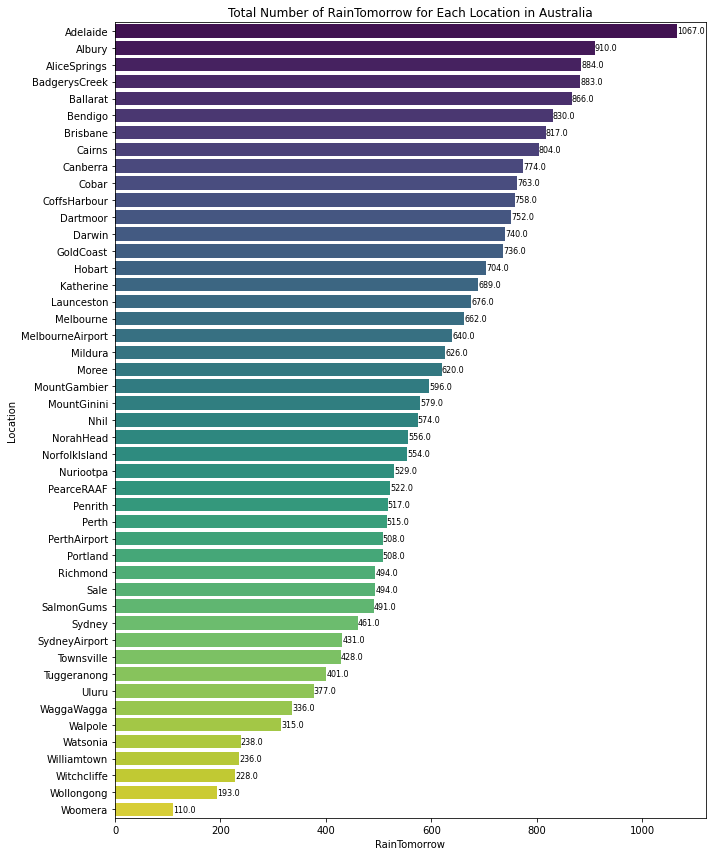

In [34]:
# Memvisualisasikan total jumlah 'RainTomorrow' untuk setiap lokasi di Australia. 
plt.figure(figsize=(10, 12))
p = sns.barplot(x='RainTomorrow', 
            y=df_loc.index, 
            data=df_loc.sort_values('RainTomorrow', ascending=False), 
            orient='h',palette='viridis')

plt.title('Total Number of RainTomorrow for Each Location in Australia')
plt.tight_layout()
for container in p.containers:
    p.bar_label(container,size=8,fmt='%.1f')

**Kesimpulan**

Berdasarkan barplot dan informasi di atas, diketahui bahwa daerah Adelaide memiliki jumlah rata-rata prediksi terjadinya hujan pada hari esok lebih tinggi dibandingkan daerah lainnya.

### Count Plot of Target Column

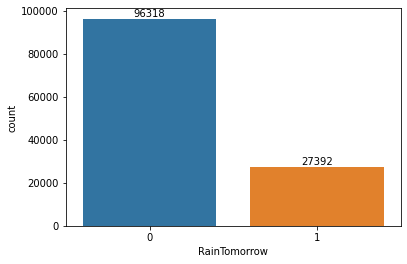

In [35]:
ax = sns.countplot(x=df['RainTomorrow'])
for i in ax.containers:
    ax.bar_label(i,)

**Kesimpulan**

Terlihat bahwa jumlah 'No' pada kolom RainTomorrow adalah sebanyak 96318 data, sedangkan untuk jumlah 'Yes' adalah 27392. Lalu, akan dilihat Count Plot pada kolom RainTomorrow untuk setiap daerah di Australia.

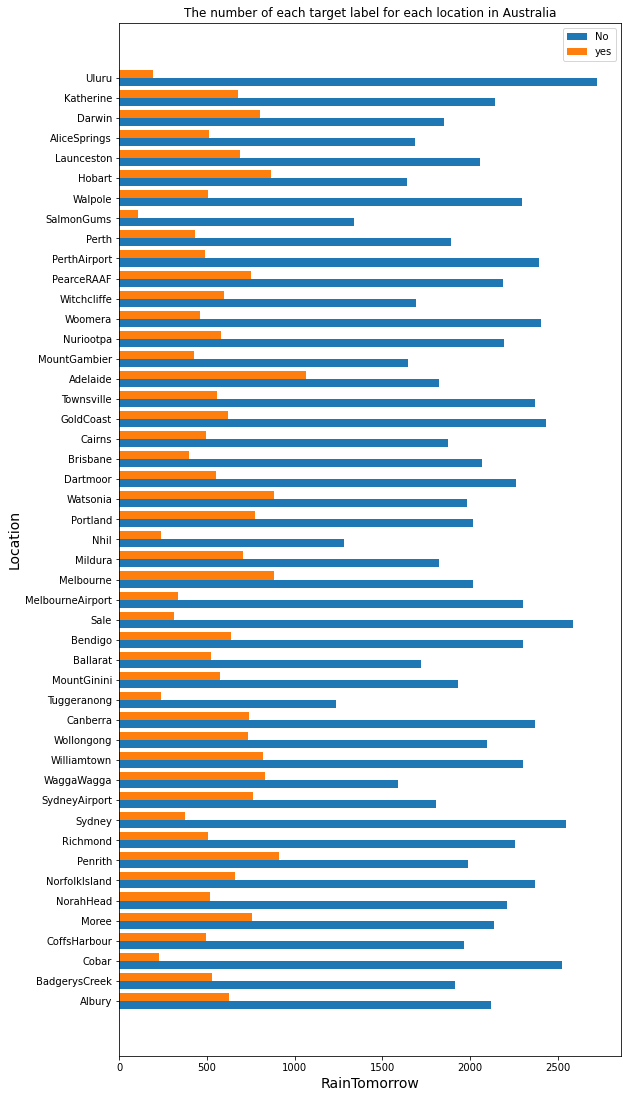

In [36]:
# Target 'No' berdasarkan kota
no = df[(df['RainTomorrow']==0)].groupby('Location').count()['RainTomorrow'].values

# Target 'Yes' berdasarkan kota
yes = df[(df['RainTomorrow']==1)].groupby('Location').count()['RainTomorrow'].values

# Visualisasi
sumbu_y_ticks = list(df['Location'].unique())
sumbu_y_axis = np.arange(0,len(sumbu_y_ticks),1)

plt.figure(figsize=(9,19))
plt.barh(sumbu_y_axis-0.2, no,0.4,label='No')
plt.barh(sumbu_y_axis + 0.2, yes, 0.4, label = 'yes')
plt.yticks(sumbu_y_axis,sumbu_y_ticks, )
plt.ylabel("Location", fontsize=14)
plt.xlabel("RainTomorrow", fontsize=14)
plt.title("The number of each target label for each location in Australia")
plt.legend()
plt.show()


### Correlation of RainTomorrow with All Attributes

In [37]:
le = LabelEncoder()
df.WindGustDir = le.fit_transform(df.WindGustDir)
df.WindDir9am = le.fit_transform(df.WindDir9am)
df.WindDir3pm = le.fit_transform(df.WindDir3pm)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int32  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int32  
 9   WindDir3pm     123710 non-null  int32  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

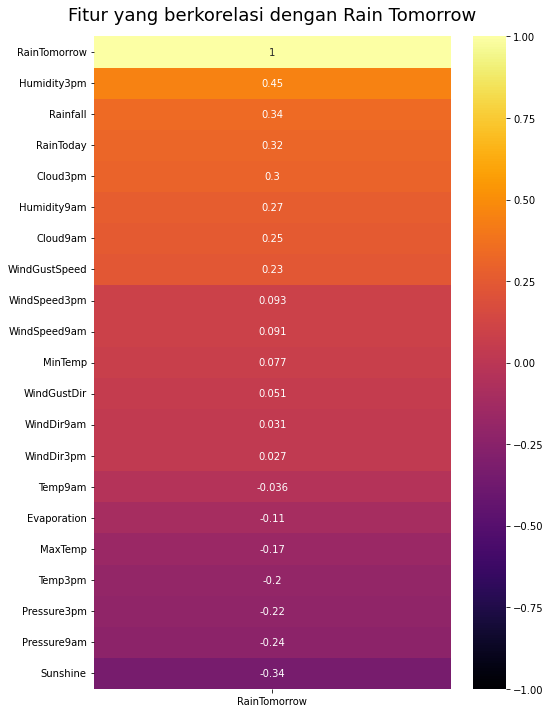

In [39]:
# Melihat korelasi antara data feature dengan data target
plt.figure(figsize=(8, 12))
hm1 = sns.heatmap(df.corr()[['RainTomorrow']].sort_values(by='RainTomorrow', ascending=False), vmin=-1, vmax=1, annot=True, cmap='inferno')
hm1.set_title('Fitur yang berkorelasi dengan Rain Tomorrow', fontdict={'fontsize':18}, pad=16);

**Kesimpulan**

Dapat dilihat bahwa fitur yang `paling berkorelasi dengan kolom 'RainTomorrow' adalah Humidity3pm, Rainfall, RainToday, Cloud3pm, Humidity9am, dan Cloud9am`. Sedangkan, fitur dengan korelasi terendah yakni MinTemp, WindGustDir, WindDir9am, WindDir3pm, dan Temp9am.

## **Data Preprocessing** 
<hr>
Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Correlation Analysis

In [40]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  object 
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int32  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int32  
 9   WindDir3pm     123710 non-null  int32  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Pressure3pm    123710 non-null  float64
 16  Cloud9am       123710 non-null  float64
 17  Cloud3pm       123710 non-nul

In [41]:
# Mengubah kolom location menjadi kolom numerik
df.Location = le.fit_transform(df.Location)

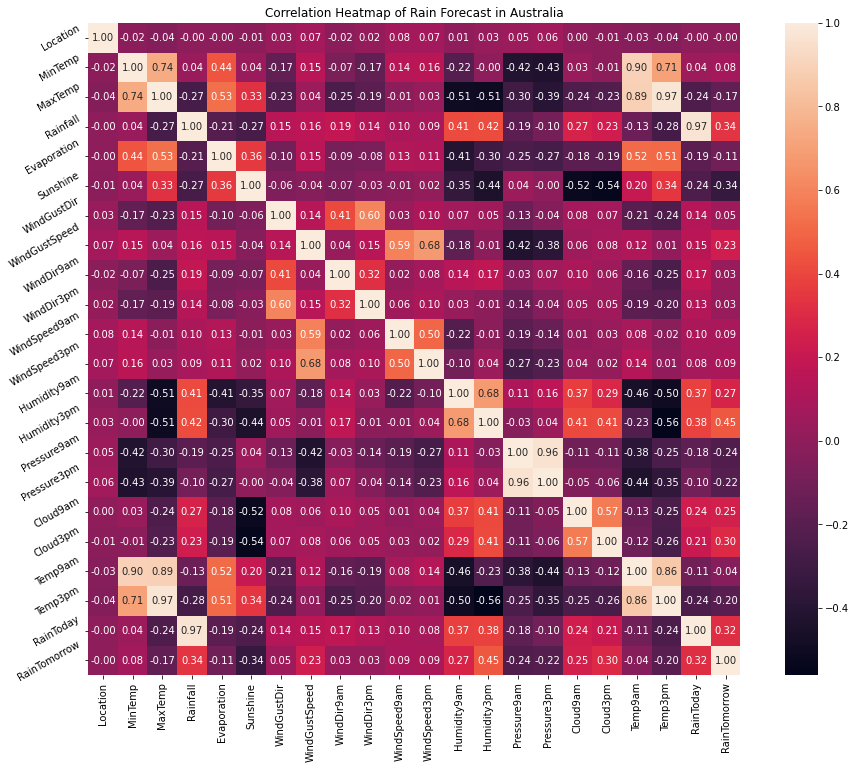

In [42]:
# Menampilkan data korelasi menggunakan heatmap
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain Forecast in Australia')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

### Menghapus kolom multikoliniearitas

Berdasarkan Heatmap terlihat bahwa MaxTemp dan Temp3pm serta Pressure9am dan Pressure3pm memiliki korelasi yang tinggi yaitu secara berturut-turut sebesar 0,97 dan 0,96. Oleh karena itu, salah satu dari dua kolom yang multikolinearitas harus dihapus.

In [43]:
# Menghapus kolom 'Temp3pm','Pressure3pm'
df.drop(['Temp3pm','Pressure3pm'], axis=1, inplace=True)

In [44]:
# Melakukan reset indeks pada DataFrame (df) dan menyimpan perubahan secara langsung ke DataFrame 
df.reset_index(drop=True, inplace=True)

In [45]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  int32  
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int32  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int32  
 9   WindDir3pm     123710 non-null  int32  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Cloud9am       123710 non-null  float64
 16  Cloud3pm       123710 non-null  float64
 17  Temp9am        123710 non-nul

### Feature selection

In [46]:
# Import Library yang Dibutuhkan
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [47]:
# Berisi semua variabel independen (fitur) dari dataset kecuali kolom "RainTomorrow"
x_transform = df.drop(["RainTomorrow"], axis=1)

# Berisi variabel dependen
Y= df['RainTomorrow']

In [48]:
# Feature selection untuk logistic regression
sfs = SFS(LogisticRegression(), n_features_to_select=10)

Langkah selanjutnya SFS(Sequential Feature Selector) dilatih menggunakan data x_transform sebagai fitur dan Y sebagai target. Proses pelatihan ini akan secara iteratif mengevaluasi performa model dengan menyertakan atau mengeluarkan fitur satu per satu untuk memilih kombinasi fitur terbaik.

Setelah proses pelatihan selesai, kita menggunakan metode ini untuk mendapatkan nama fitur yang telah dipilih oleh SFS. Ini akan memberikan daftar nama fitur yang terpilih sesuai dengan kriteria yang telah ditentukan selama pelatihan. Fitur-fitur ini dianggap sebagai fitur terbaik berdasarkan evaluasi yang dilakukan oleh Sequential Feature Selector.

In [49]:
# Melatih dan mendapatkan fitur terbaik berdasarkan evaluasi SFS
sfs.fit(x_transform, Y)
sfs.get_feature_names_out()

array(['MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
       'RainToday'], dtype=object)

In [50]:
# Memilih fitur yang relevan atau penting dalam konteks analisis atau pemodelan
X_fit=df[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday']]

### Splitting dataset

In [51]:
X_train, X_test, y_train, y_test= train_test_split(X_fit, Y, test_size=0.20)

## **Pendefinisian Model** 
<hr>
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.



In [52]:
# Membuat objek model Logistic Regression dengan library scikit-learn
logreg = LogisticRegression(C=0.8, class_weight='balanced', solver='liblinear', random_state=0)

* LogisticRegression merupakan model regresi logistik.
* C=0.8 adalah parameter yang mengontrol kekuatan regularisasi. Nilai yang lebih tinggi menghasilkan regularisasi yang lebih lemah.
* class_weight='balanced' memberikan bobot yang seimbang pada setiap kelas untuk menangani ketidakseimbangan dalam data.
* solver='liblinear' adalah algoritma yang digunakan untuk menyelesaikan masalah optimasi. 'liblinear' cocok untuk dataset kecil hingga menengah dan cocok untuk penanganan regularisasi L1.
* random_state=0 menetapkan seed untuk memastikan reproduktibilitas hasil.

In [53]:
# Membuat objek model SVM dengan library scikit-learn
svm = svm.SVC(class_weight='balanced', kernel='linear')

* SVC (Support Vector Classification) adalah model Support Vector Machine untuk klasifikasi.
* class_weight='balanced' memberikan bobot yang seimbang pada setiap kelas, mirip dengan pada regresi logistik.
* kernel='linear' menggunakan kernel linear untuk menentukan fungsi keputusan. SVM dengan kernel linear cocok untuk masalah klasifikasi dengan dataset yang lebih besar.

Terdapat dua metode pengujian yang akan digunakan pada project kali, antara lain :
1. Metode <b>Logistic Regression</b>. Logistic Regression adalah sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu.</p>

2. Metode <b>Support Vector Machine (SVM)</b>. SVM adalah algoritma klasifikasi yang digunakan untuk menemukan hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu. SVM bekerja dengan mencari hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur. Hyperplane ini dipilih sedemikian rupa sehingga memiliki margin terbesar, yaitu jarak terpendek antara batas keputusan dan titik-titik terdekat dari masing-masing kelas. Dengan demikian, SVM dapat menghasilkan model klasifikasi yang optimal untuk data yang kompleks.



## **Pelatihan Model** 
<hr>
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

In [54]:
# Melatih machine learning menggunaka data penelitian

# Logistic Regression
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# SVM
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

## **Evaluasi Model** 
<hr>
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Jika memilih untuk melakukan model deployment, lanjut ke poin dibawah. Jika tidak, lanjut ke poin 5 dan 6.

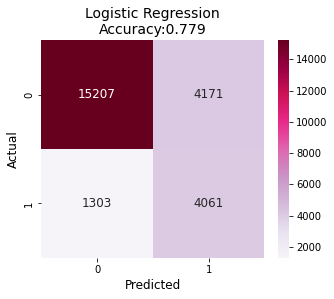

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.78      0.85     19378
           1       0.49      0.76      0.60      5364

    accuracy                           0.78     24742
   macro avg       0.71      0.77      0.72     24742
weighted avg       0.83      0.78      0.79     24742

Accuracy Score: 0.7787567698650069
Precision Score: 0.4933187560738581
Recall Score: 0.7570842654735273
F1 Score: 0.5973815828184761


In [55]:
# Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("Logistic Regression\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_lr)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Menampilkan Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Menampilkan metrik evaluasi
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score: {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score: {recall_score(y_test,y_pred_lr)}')
print("F1 Score:",f1_score(y_test,y_pred_lr))

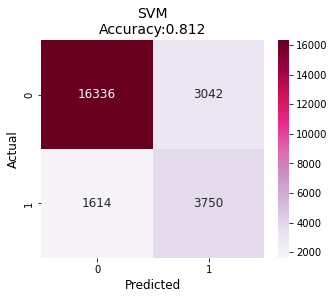

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.84      0.88     19378
           1       0.55      0.70      0.62      5364

    accuracy                           0.81     24742
   macro avg       0.73      0.77      0.75     24742
weighted avg       0.83      0.81      0.82     24742

Accuracy Score: 0.8118179613612481
Precision Score: 0.5521201413427562
Recall Score: 0.6991051454138703
F1 Score: 0.6169792694965449


In [56]:
# SVM
cm = confusion_matrix(y_test, y_pred_svm)

# Membuat heatmap untuk confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Menampilkan Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Menampilkan metrik evaluasi
print(f'Accuracy Score: {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score: {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score: {recall_score(y_test,y_pred_svm)}')
print("F1 Score:",f1_score(y_test,y_pred_svm))

**Kesimpulan**

Karena jumlah False negatif tidak mendekati jumlah False positif maka acuan performansi algoritma ditentukan berdasarkan F1 Score. Model Logistic memiliki F1 Score 0.597. Model SVM memiliki F1 Score sebesar 0.616. Oleh karena itu, dalam kasus ini `algoritma SVM memiliki performa yang lebih baik dari pada Logistic Regression.`

## **Model Inference** 
<hr>
Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
# Menampilkan informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123710 entries, 0 to 123709
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  int32  
 1   MinTemp        123710 non-null  float64
 2   MaxTemp        123710 non-null  float64
 3   Rainfall       123710 non-null  float64
 4   Evaporation    123710 non-null  float64
 5   Sunshine       123710 non-null  float64
 6   WindGustDir    123710 non-null  int32  
 7   WindGustSpeed  123710 non-null  float64
 8   WindDir9am     123710 non-null  int32  
 9   WindDir3pm     123710 non-null  int32  
 10  WindSpeed9am   123710 non-null  float64
 11  WindSpeed3pm   123710 non-null  float64
 12  Humidity9am    123710 non-null  float64
 13  Humidity3pm    123710 non-null  float64
 14  Pressure9am    123710 non-null  float64
 15  Cloud9am       123710 non-null  float64
 16  Cloud3pm       123710 non-null  float64
 17  Temp9am        123710 non-nul

In [59]:
# Pemilihan fitur
df_new= df[['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Humidity9am', 'Pressure9am', 'Cloud9am', 'RainToday']]

In [60]:
# Melakukan standarisasi atau normalisasi fitur-fitur pada DataFrame df_new menggunakan StandardScaler
scaler_ = StandardScaler()
scaler_.fit(df_new)
scaled_features_ = scaler_.transform(df_new)
df_feat_ = pd.DataFrame(scaled_features_, columns= df_new.columns)
df_feat_.head()

,Rainfall,Sunshine,WindGustSpeed,Humidity3pm,Humidity9am,Pressure9am,Cloud9am,RainToday
0,0.142912,0.1319,0.275985,-1.384978,0.175299,-1.435660,1.466459,-0.537832
1,-0.613573,0.1319,0.275985,-1.241022,-1.247529,-1.007017,0.161442,-0.537832
2,-0.613573,0.1319,0.432894,-1.001096,-1.563714,-1.450440,0.161442,-0.537832
3,-0.613573,0.1319,-1.293108,-1.672890,-1.194832,0.027636,0.161442,-0.537832
4,0.647236,0.1319,0.040621,-0.857140,0.754970,-0.977456,1.031453,-0.537832


In [61]:
df_final_ = df_feat_.copy()

In [62]:
X = df_final_
y = df.RainTomorrow

In [63]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)

In [64]:
svm.fit(X_train1, y_train1)
y_pred_svm = svm.predict(X_test1)

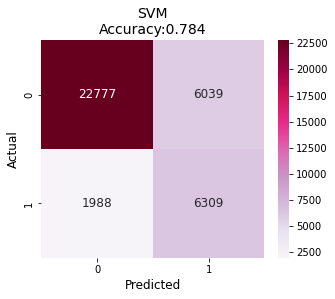

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85     28816
           1       0.51      0.76      0.61      8297

    accuracy                           0.78     37113
   macro avg       0.72      0.78      0.73     37113
weighted avg       0.83      0.78      0.80     37113

Accuracy Score:- 0.7837146013526257
Precision Score:- 0.510932944606414
Recall Score:- 0.7603953236109438
F1 Score: 0.6111891499152338


In [65]:
cm = confusion_matrix(y_test1, y_pred_svm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt=".0f", cmap="PuRd", annot_kws={"fontsize":12})
plt.title("SVM\nAccuracy:{:.3f}".format(accuracy_score(y_test1, y_pred_svm)), fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

print("Classification Report:\n", classification_report(y_test1, y_pred_svm))

print(f'Accuracy Score:- {accuracy_score(y_test1, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test1,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test1,y_pred_svm)}')
print("F1 Score:",f1_score(y_test1,y_pred_svm))

Karena dengan penambahan fitur diperoleh F1 Score lebih kecil maka selanjutnya fitur yang digunakan hanya fitur 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday' atau tanpa penambahan fitur 

In [66]:
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [67]:
scaler_ = StandardScaler()
scaler_.fit(X_train, y_train);

Model inference digunakan untuk menguji keakuratan model dengan data berupa data selain yang tersedia pada dataset.

Misalkan di Sydney pada suatu hari terjadi hujan dengan kondisi cuaca sebagai berikut :
1. Intensitas hujan : 0.3 mm
2. Lama waktu cerah dengan cahaya matahari : 5.5
3. Kecepatan angin : 20.7 km/jam
4. Humiditas jam 3 sore : 48.0 %
5. Tekanan udara jam 9 pagi : 900.5 hpa

Silahkan masukkan inputan di atas untuk memprediksi apakah besok hujan atau tidak.

In [70]:
Rainfall = float(input("Rainfall (in mm):"))
Sunshine = float(input("Sunshine hour:"))
WindGustSpeed = float(input("Wind Gust Speed:"))
Humidity3pm = float(input("Humidity percentation at 3 PM:"))
Pressure9am = float(input("Pressure at 9 AM:"))
RainToday = int(input('Is today raining? Please type 1 for YES and 0 for NO '))

val = [Rainfall, Sunshine, WindGustSpeed, Humidity3pm, Pressure9am, RainToday]
val = scaler_.transform([val])
val = val.reshape(6,)

print(val)

val_predict = svm.predict([val])

if val_predict == 1:
    print('Prediksi bernilai 1, maka akan diprediksi besok turun hujan')
elif val_predict == 0:
    print('Prediksi bernilai 0, maka akan diprediksi besok TIDAK turun hujan')
else:
    print('Prediksi tidak valid')

[ -0.23791048  -0.90258088  -1.55382157  -0.13940866 -17.26134714
   1.85344071]
Prediksi bernilai 1, maka akan diprediksi besok turun hujan


## **Pengambilan Kesimpulan** 
<hr>
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan.

1. Nilai korelasi antara Location dengan RainTomorrow adalah 0.00 Oleh karena itu, Location tidak mempengaruhi terjadinya hujan keesokan hari di Australia
2. Hasil prediksi cuaca di wilayah Australia untuk menentukan kejadian turun hujan pada keesokan hari dipengaruhi oleh beberapa variabel yaitu 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday'. Variabel tersebut berkorelasi dengan target yaitu RainTomorrow sebesar lebih dari 2
3. Berdasarkan F1 Score kedua model diperoleh bahwa SVM memiliki performa yang lebih baik untuk memprediksi kejadian turun hujan keesokan hari dengan memperhatikan 6 fitur yaitu 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity3pm', 'Pressure9am', 'RainToday'.

## **Export Model** 
<hr>

In [73]:
# save the model to disk
filename = open("PYTN_KampusMerdeka_fp2_NadiatusSalam.pkl", "wb")

pickle.dump(svm, filename)
filename.close()